Error cuadrático medio (MSE): 2900.19
Error absoluto medio (MAE): 42.79
R²: 0.45


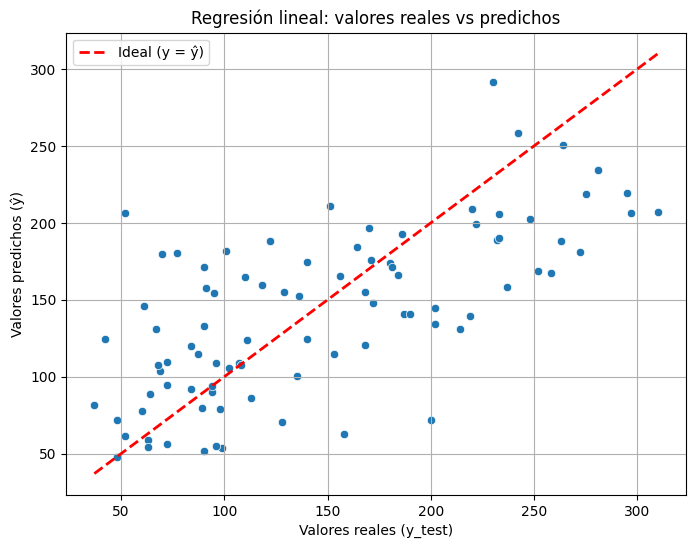

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Cargar el dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

# 2. Separar features y target
X = df.drop("target", axis=1)
y = df["target"]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predecir y evaluar
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"R²: {r2:.2f}")

# 6. Visualizar: valores reales vs predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal (y = ŷ)")
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (ŷ)")
plt.title("Regresión lineal: valores reales vs predichos")
plt.legend()
plt.grid(True)
plt.show()


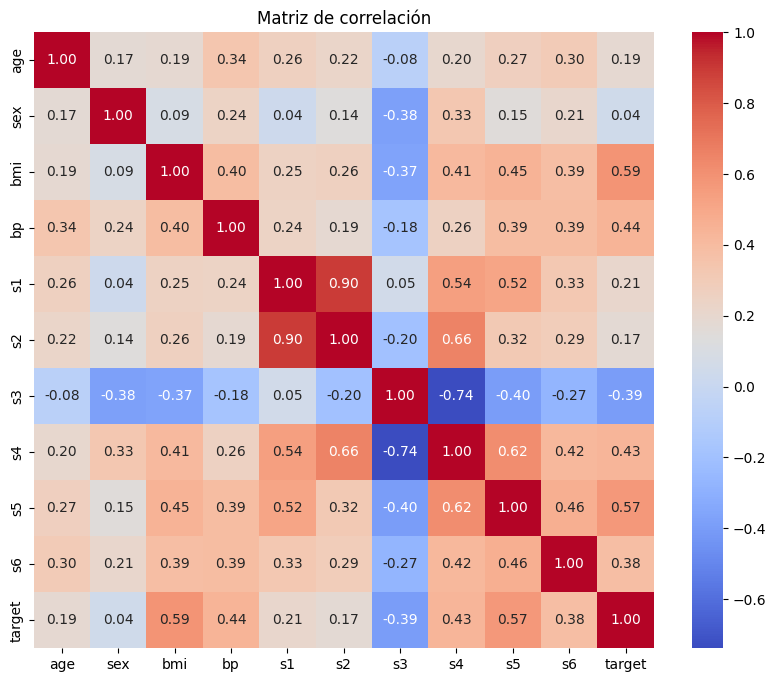

Features seleccionados (|correlación| > 0.3):
['bmi', 's5', 'bp', 's4', 's3', 's6']


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular matriz de correlación
correlaciones = df.corr()

# 2. Visualizarla con heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# 3. Obtener correlaciones con el target (ordenadas)
correlacion_target = correlaciones["target"].drop("target").sort_values(key=abs, ascending=False)

# 4. Elegir features con correlación absoluta mayor a cierto umbral
umbral = 0.3
features_seleccionados = correlacion_target[abs(correlacion_target) > umbral].index.tolist()

# 5. Mostrar resultados
print("Features seleccionados (|correlación| > 0.3):")
print(features_seleccionados)


Modelo con features seleccionados:
Error cuadrático medio (MSE): 2931.04
Error absoluto medio (MAE): 43.90
R²: 0.45


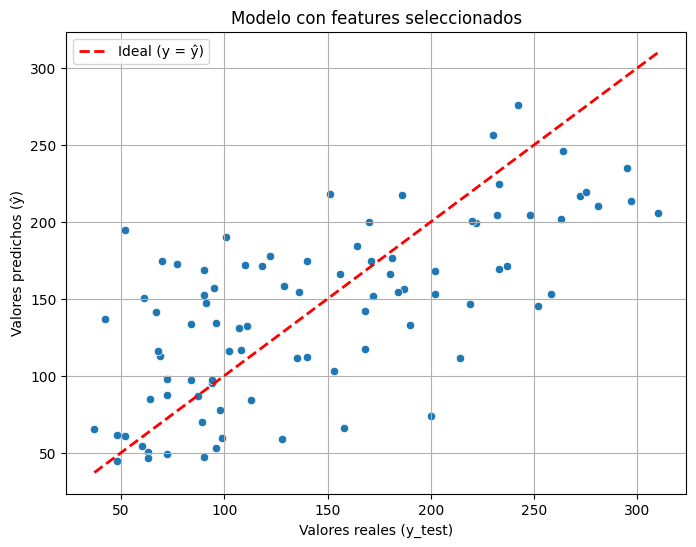

In [14]:
# 1. Crear un nuevo DataFrame solo con los features seleccionados
X_filtrado = df[features_seleccionados]
y = df["target"]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtrado, y, test_size=0.2, random_state=42)

# 3. Entrenar el modelo
modelo_filtrado = LinearRegression()
modelo_filtrado.fit(X_train, y_train)

# 4. Predecir y evaluar
y_pred = modelo_filtrado.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modelo con features seleccionados:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"R²: {r2:.2f}")

# 5. Visualización: valores reales vs predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal (y = ŷ)")
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (ŷ)")
plt.title("Modelo con features seleccionados")
plt.legend()
plt.grid(True)
plt.show()



Modelo Ridge (con features seleccionados):
Error cuadrático medio (MSE): 3084.28
Error absoluto medio (MAE): 46.06
R²: 0.42


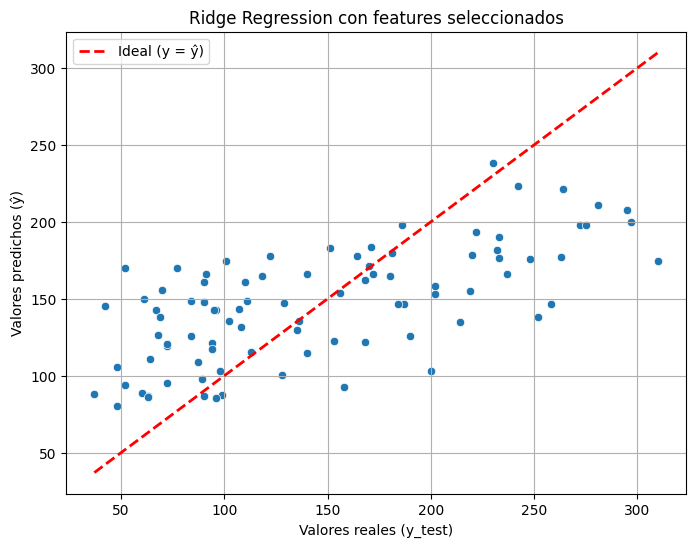

In [15]:
from sklearn.linear_model import Ridge

# 1. Crear conjunto de datos con features seleccionados
X_filtrado = df[features_seleccionados]
y = df["target"]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtrado, y, test_size=0.2, random_state=42)

# 3. Entrenar modelo Ridge (con alpha=1.0 como valor inicial)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# 4. Predecir y evaluar
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Modelo Ridge (con features seleccionados):")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"R²: {r2:.2f}")

# 5. Visualización: valores reales vs predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal (y = ŷ)")
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (ŷ)")
plt.title("Ridge Regression con features seleccionados")
plt.legend()
plt.grid(True)
plt.show()


Mejor alpha: 0.0785
Mejor R² en validación cruzada: 0.4396

Evaluación en test set:
Error cuadrático medio (MSE): 2893.14
Error absoluto medio (MAE): 43.77
R²: 0.45


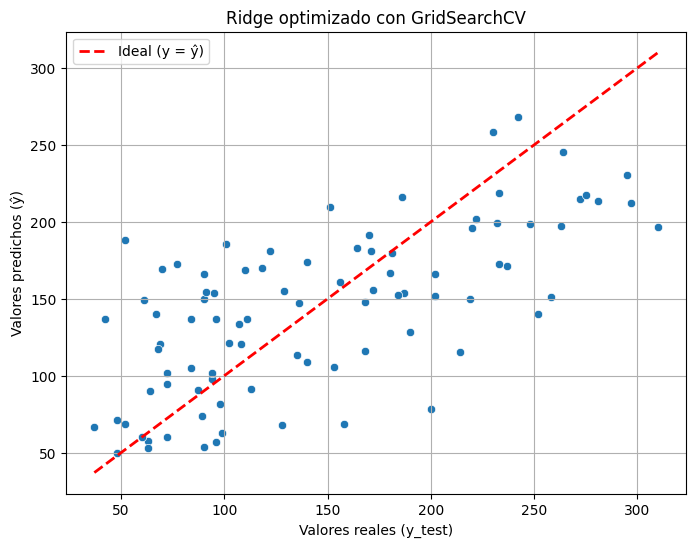

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# 1. Crear conjunto de datos
X_filtrado = df[features_seleccionados]
y = df["target"]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtrado, y, test_size=0.2, random_state=42)

# 3. Definir el modelo y los valores de alpha a probar
ridge = Ridge()
param_grid = {"alpha": np.logspace(-3, 3, 20)}  # Prueba desde 0.001 a 1000

# 4. GridSearch con validación cruzada
grid = GridSearchCV(ridge, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

# 5. Mejor modelo y mejor alpha
print(f"Mejor alpha: {grid.best_params_['alpha']:.4f}")
print(f"Mejor R² en validación cruzada: {grid.best_score_:.4f}")

# 6. Evaluar en el set de test
best_ridge = grid.best_estimator_
y_pred = best_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación en test set:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"R²: {r2:.2f}")

# 7. Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal (y = ŷ)")
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (ŷ)")
plt.title("Ridge optimizado con GridSearchCV")
plt.legend()
plt.grid(True)
plt.show()


Mejor alpha: 0.08859
Mejor R² en validación cruzada: 0.4441

Evaluación en test set:
Error cuadrático medio (MSE): 2893.36
Error absoluto medio (MAE): 43.74
R²: 0.45


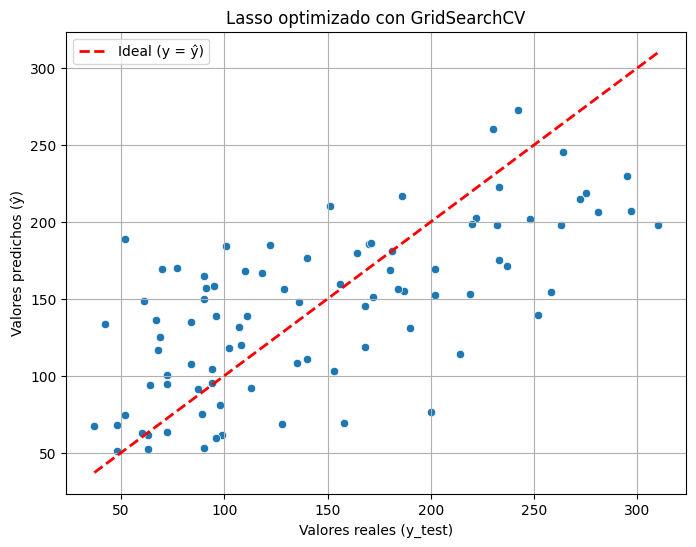

In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# 1. Crear conjunto de datos
X_filtrado = df[features_seleccionados]
y = df["target"]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_filtrado, y, test_size=0.2, random_state=42)

# 3. Definir modelo y rango de alpha
lasso = Lasso(max_iter=10000)
param_grid = {"alpha": np.logspace(-4, 0, 20)}  # Desde 0.0001 hasta 1

# 4. GridSearchCV para encontrar mejor alpha
grid = GridSearchCV(lasso, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

# 5. Mejor modelo y alpha
print(f"Mejor alpha: {grid.best_params_['alpha']:.5f}")
print(f"Mejor R² en validación cruzada: {grid.best_score_:.4f}")

# 6. Evaluar en test
best_lasso = grid.best_estimator_
y_pred = best_lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación en test set:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"R²: {r2:.2f}")

# 7. Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal (y = ŷ)")
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (ŷ)")
plt.title("Lasso optimizado con GridSearchCV")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
coef_lasso = pd.Series(best_lasso.coef_, index=X_filtrado.columns)
print("Coeficientes Lasso:")
print(coef_lasso)

print("\nFeatures eliminados por Lasso:")
print(coef_lasso[coef_lasso == 0].index.tolist())


Coeficientes Lasso:
bmi    577.901736
s5     412.975331
bp     277.011290
s4      -0.000000
s3    -197.760270
s6       8.292852
dtype: float64

Features eliminados por Lasso:
['s4']


Mejor alpha: 0.0046
Mejor R² en validación cruzada: 0.4427

Evaluación en test set:
Error cuadrático medio (MSE): 2851.70
Error absoluto medio (MAE): 43.14
R²: 0.46


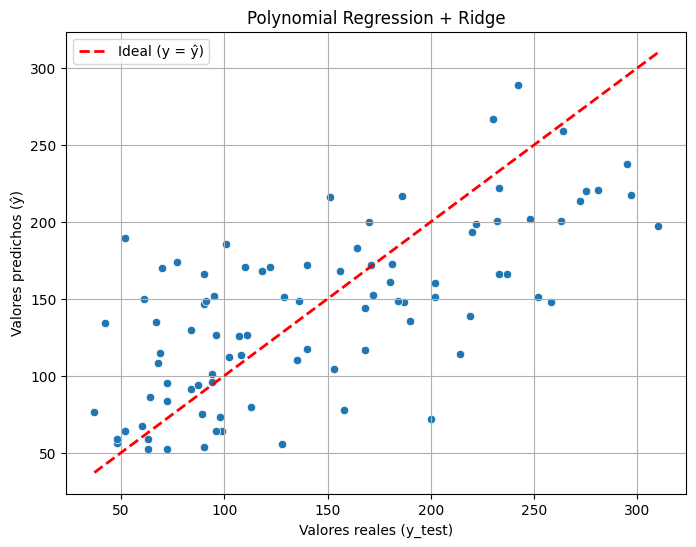

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Transformar los features seleccionados con grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# 2. Crear pipeline: Polynomial + Ridge
modelo_poly = make_pipeline(poly, Ridge())

# 3. Definir valores de alpha a probar
param_grid = {
    "ridge__alpha": np.logspace(-3, 3, 10)
}

# 4. GridSearchCV con polynomial features + ridge
grid = GridSearchCV(modelo_poly, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

# 5. Resultados
print(f"Mejor alpha: {grid.best_params_['ridge__alpha']:.4f}")
print(f"Mejor R² en validación cruzada: {grid.best_score_:.4f}")

# 6. Evaluación en test
mejor_modelo_poly = grid.best_estimator_
y_pred = mejor_modelo_poly.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluación en test set:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"R²: {r2:.2f}")

# 7. Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal (y = ŷ)")
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Valores predichos (ŷ)")
plt.title("Polynomial Regression + Ridge")
plt.legend()
plt.grid(True)
plt.show()


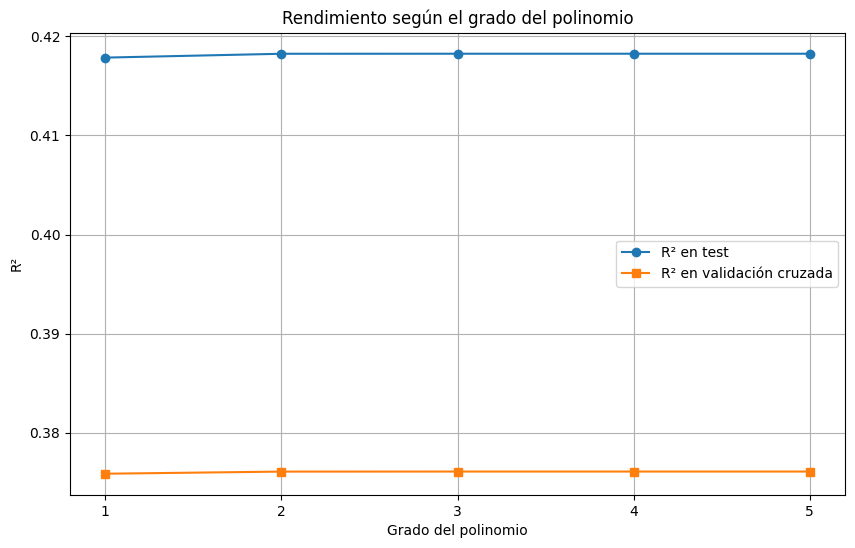

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

grados = range(1, 6)
r2_train_scores = []
r2_val_scores = []

for grado in grados:
    # Pipeline: PolynomialFeatures + Ridge
    modelo = Pipeline([
        ("poly", PolynomialFeatures(degree=grado, include_bias=False)),
        ("ridge", Ridge(alpha=1.0))
    ])
    
    # Entrenamiento
    modelo.fit(X_train, y_train)
    
    # R² en test
    r2_test = modelo.score(X_test, y_test)
    r2_train_scores.append(r2_test)
    
    # R² en validación cruzada (cv=5)
    r2_cv = cross_val_score(modelo, X_train, y_train, cv=5, scoring="r2").mean()
    r2_val_scores.append(r2_cv)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grados, r2_train_scores, marker='o', label="R² en test")
plt.plot(grados, r2_val_scores, marker='s', label="R² en validación cruzada")
plt.xlabel("Grado del polinomio")
plt.ylabel("R²")
plt.title("Rendimiento según el grado del polinomio")
plt.xticks(grados)
plt.legend()
plt.grid(True)
plt.show()
